In [1]:
import pandas as pd

### Read parquet created by Spark job

In [2]:
df = pd.read_parquet("outputs/world_population/world_population_growth.parquet")
df

,country,year,population,population_growth
0,Afghanistan,1950,7480461,NaN
1,Afghanistan,1951,7571537,91076.0
2,Afghanistan,1952,7667533,95996.0
3,Afghanistan,1953,7764546,97013.0
4,Afghanistan,1954,7864285,99739.0
...,...,...,...,...
17311,Zimbabwe,2019,15354608,302424.0
17312,Zimbabwe,2020,15669666,315058.0
17313,Zimbabwe,2021,15993524,323858.0
17314,Zimbabwe,2022,16320537,327013.0


### A simple aggregation of sustainable growth and peaks

In [69]:
def aggregate(sub_df):
    mean_population_growth = sub_df["population_growth"].mean()
    max_population = sub_df["population"].iloc[-1]
    population_growth_ratio = mean_population_growth / max_population
    population_growth_peak = sub_df["population_growth"].max()
    population_growth_peak_year = sub_df.loc[sub_df["population_growth"] == population_growth_peak, "year"].iloc[0]

    return pd.DataFrame({
        "current_population": max_population,
        "population_growth": population_growth_ratio,
        "population_growth_peak_year": population_growth_peak_year,
    }, index=[sub_df["country"].iloc[0]])

results_per_country = pd.concat([aggregate(sub_df) for _, sub_df in df.groupby("country")]).reset_index()
results_per_country.rename(columns={"index": "country"}, inplace=True)
results_per_country

,country,current_population,population_growth,population_growth_peak_year
0,Afghanistan,42239854,0.011273,1993
1,Albania,2832439,0.007641,1972
2,Algeria,45606480,0.010989,2017
3,American Samoa,43914,0.007762,1989
4,Andorra,80088,0.012672,2003
...,...,...,...,...
229,Wallis & Futuna,11502,0.003534,1982
230,Western Sahara,587259,0.013396,2013
231,Yemen,34449825,0.011825,2014
232,Zambia,20569737,0.012155,2023


### Now a simple plotting

In [73]:
import matplotlib.pyplot as plt

In [77]:
sample = results_per_country.sample(20)

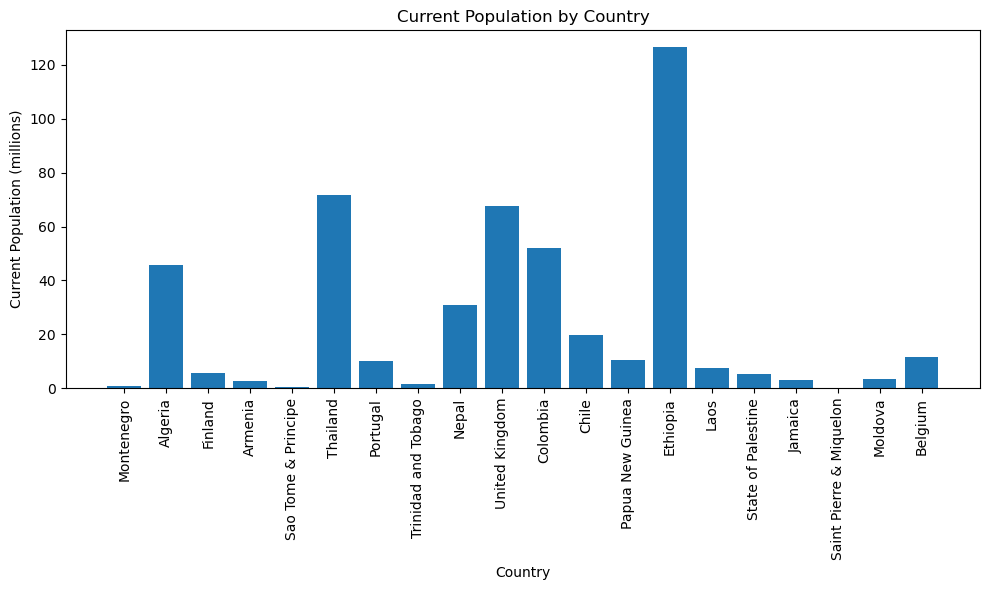

In [80]:
# Bar plot of current population
plt.figure(figsize=(10, 6))
plt.bar(sample['country'], sample['current_population'] / 1_000_000)
plt.xlabel('Country')
plt.ylabel('Current Population (millions)')
plt.title('Current Population by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

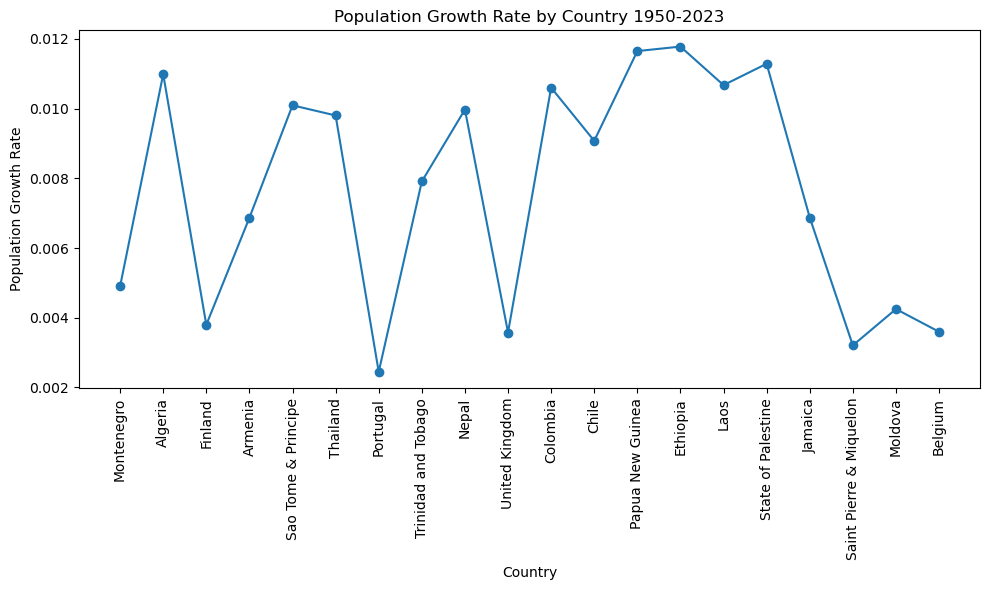

In [81]:
# Line plot of population growth rate
plt.figure(figsize=(10, 6))
plt.plot(sample['country'], sample['population_growth'], marker='o')
plt.xlabel('Country')
plt.ylabel('Population Growth Rate')
plt.title('Population Growth Rate by Country 1950-2023')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

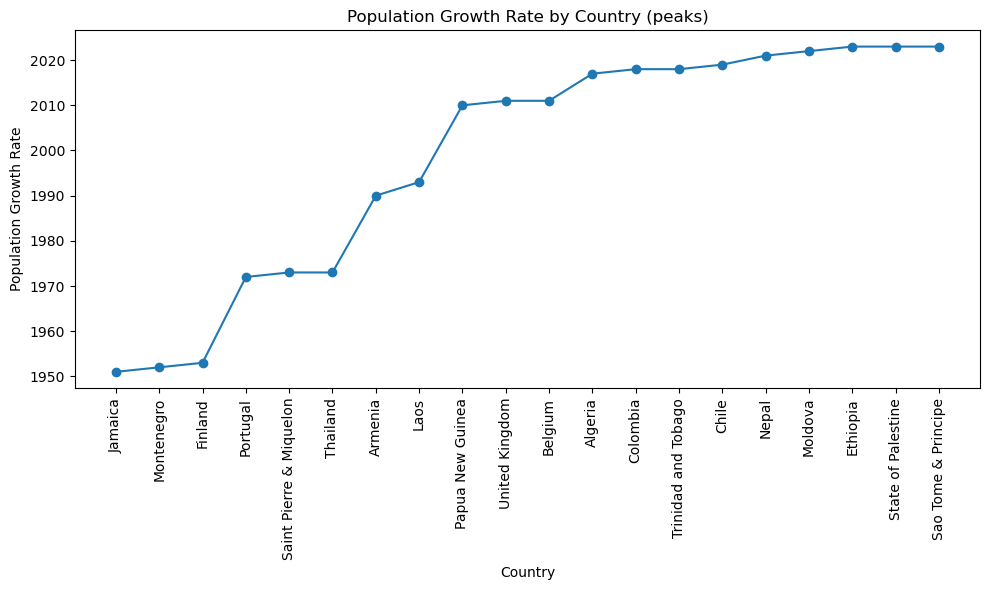

In [91]:
# Convert 'population_growth_peak_year' to integer for plotting
sample['population_growth_peak_year'] = sample['population_growth_peak_year'].astype(int)

# Sort DataFrame by 'population_growth_peak_year'
df_sorted = sample.sort_values(by='population_growth_peak_year')

# Line plot of population growth rate
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['country'], df_sorted['population_growth_peak_year'], marker='o')
plt.xlabel('Country')
plt.ylabel('Population Growth Rate')
plt.title('Population Growth Rate by Country (peaks)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()